Data before transforming:
      day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  \
0      1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3   
1      2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0   
2      3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3   
3      4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0   
4      5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2   
..   ...    ...   ...          ...  ...  ...    ...   ...  ...   ...  ...   
117   26      9  2012           31   54   11    0.0  82.0  6.0  16.3  2.5   
118   27      9  2012           31   66   11    0.0  85.7  8.3  24.9  4.0   
119   28      9  2012           32   47   14    0.7  77.5  7.1   8.8  1.8   
120   29      9  2012           26   80   16    1.8  47.4  2.9   7.7  0.3   
121   30      9  2012           25   78   14    1.4  45.0  1.9   7.5  0.2   

     BUI  FWI  Fire  
0    3.4  0.5     y  
1   

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-

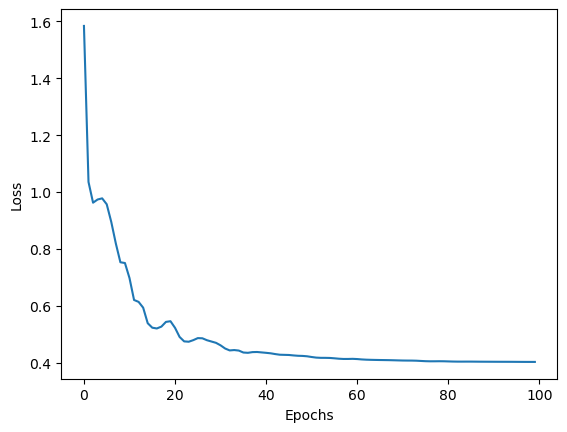

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

df=pd.read_csv("Forest_fire.csv")

#data preprocessing
le=LabelEncoder()
scale=StandardScaler()
print("Data before transforming:\n",df)
df['Fire']=le.fit_transform(df['Fire'])
print("Data after transforming:\n",df)

inplist=df.columns[:-1]
print("Data before scaling:\n",df)
df[inplist]=scale.fit_transform(df[inplist])
print("Data after scaling:\n",df)

x=df.values[:,:-1]
y=df.values[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

cf=MLPClassifier(hidden_layer_sizes=(3),activation="logistic",max_iter=100,solver="adam",learning_rate="constant",learning_rate_init=0.9)

cf.fit(x_train,y_train)

y_pred=cf.predict(x_test)

con=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",con)
cla=classification_report(y_test,y_pred)
print("classification report:\n",cla)

print("coefficient:",cf.coefs_)
print("intercept: ",cf.intercepts_)

# Print weight matrices
print("\nWeight Matrices:")
for i, weight_matrix in enumerate(clf.coefs_):
    print(f"\nLayer {i + 1} Weights (Shape {weight_matrix.shape}):\n", weight_matrix)

loss_values=cf.loss_curve_

plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

df=pd.read_csv("Forest_fire.csv")

#data preprocessing
le=LabelEncoder()
scale=StandardScaler()
print("Data before transforming:\n",df)
df['Fire']=le.fit_transform(df['Fire'])
print("Data after transforming:\n",df)

inplist=df.columns[:-1]
print("Data before scaling:\n",df)
df[inplist]=scale.fit_transform(df[inplist])
print("Data after scaling:\n",df)

x=df.values[:,:-1]
y=df.values[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

cf=MLPClassifier(hidden_layer_sizes=(5),activation="logistic",max_iter=200,solver="adam",learning_rate="constant",learning_rate_init=0.8)

cf.fit(x_train,y_train)

y_pred=cf.predict(x_test)

con=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",con)
cla=classification_report(y_test,y_pred)
print("classification report:\n",cla)

print("coefficient:",cf.coefs_)
print("intercept: ",cf.intercepts_)

# Print weight matrices
print("\nWeight Matrices:")
for i, weight_matrix in enumerate(clf.coefs_):
    print(f"\nLayer {i + 1} Weights (Shape {weight_matrix.shape}):\n", weight_matrix)

loss_values=cf.loss_curve_

plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject